# ICT EXIT TEST - CODING TEST

In [373]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

Import necessary libraries such as numpy, pandas, pyplot and seaborn

# 1. Load the dataset

In [374]:
df = pd.read_csv('train_exit.csv')

Load the given csv dataset into the jupyter environment.

# 2. Exploratory Data Analysis (EDA)

In [375]:
df.shape

(13994, 30)

In [376]:
df.size

419820

In [377]:
df.head(3)

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,M,Ukraine,6'2,176lbs,77.0,58.0,47.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,Herma Tann,18,M,Russia,5'10,148lbs,54.0,69.0,70.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,Eilene Kizer,16,F,Spain,6'2,172lbs,34.0,43.0,45.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1


In [378]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_id                  13994 non-null  object 
 1   name                       13994 non-null  object 
 2   age                        13994 non-null  int64  
 3   gender                     13975 non-null  object 
 4   country                    13994 non-null  object 
 5   height                     13994 non-null  object 
 6   weight                     13577 non-null  object 
 7   ball_controlling_skills    13581 non-null  float64
 8   body_reflexes              13994 non-null  float64
 9   body_balance               13994 non-null  float64
 10  jumping_skills             13970 non-null  float64
 11  penalties_conversion_rate  13964 non-null  float64
 12  mental_strength            13966 non-null  float64
 13  goalkeeping_skills         13994 non-null  flo

Initial analysis shows that the given dataset is related to soccer player and their statistics from various countries, 
and the intention of this data is to ease the selection process using machine model. 

In [379]:
print("Number of unique values in 'selection':",
      df.selection.nunique())
print("Unique values in 'selection' column:",
      df.selection.unique()[0],"and",
      df.selection.unique()[1])

Number of unique values in 'selection': 2
Unique values in 'selection' column: 1 and 0


<Axes: xlabel='selection', ylabel='count'>

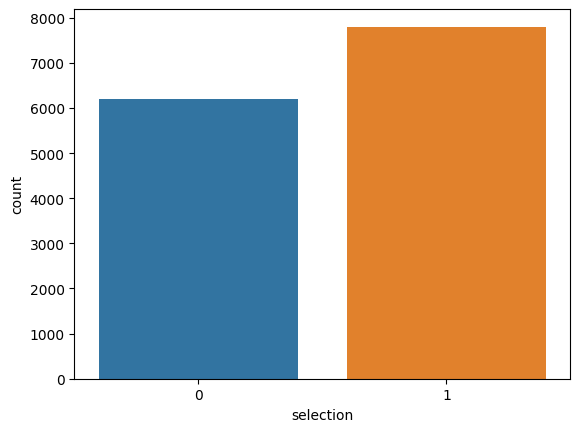

In [380]:
sns.countplot(df, x='selection')

In [381]:
selection_count = df['selection'].value_counts()
total_count = df['selection'].size

print(selection_count,"\n")

print("selection (%)")
print("1",round((selection_count[1]/total_count),1)*100)
print("0",round((selection_count[0]/total_count),2)*100)

selection
1    7802
0    6192
Name: count, dtype: int64 

selection (%)
1 60.0
0 44.0


And the given dataset suitable for supervised classification machine modeling, and reserve **"selection"** as the target variable.
Consider '0' as not selected and '1' as selected in labelling. And the label are nearly 50% of the whole dataset, that means it is a balanced dataset.

## 2.1 Statistical Analysis

In [382]:
df.describe()

,age,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,defending_skills,passing_skills,...,shot_accuracy,body_strength_stamina,max_running_speed,behaviour_rating,matches_played,fitness_rating,trophies_won,years_of_experience,no_of_disqualifications,selection
count,13994.000000,13581.000000,13994.000000,13994.000000,13970.000000,13964.000000,13966.000000,13994.000000,13994.000000,13994.000000,...,13422.000000,13994.000000,13994.000000,13291.000000,13328.000000,13299.000000,13994.000000,13850.000000,13994.000000,13994.000000
mean,21.135844,56.043958,61.934329,62.753323,63.612026,48.495703,56.768366,16.474632,48.108118,52.935973,...,47.178140,62.652780,23.586094,5.822068,3.908463,6.405482,3.389095,6.434152,-4.740675,0.557525
std,5.162719,16.787353,14.931963,14.203638,11.938712,15.767506,11.977744,16.874551,16.821929,14.201782,...,15.803991,11.512526,5.194387,1.095702,13.583229,1.706983,1.709152,4.450954,72.023656,0.496698
min,16.000000,5.000000,12.000000,9.000000,14.000000,7.000000,9.000000,1.000000,9.000000,13.000000,...,7.000000,15.000000,5.400000,2.100000,0.000000,1.000000,0.000000,1.000000,-999.000000,0.000000
25%,17.000000,51.000000,54.000000,55.000000,57.000000,39.000000,49.000000,10.000000,36.000000,45.000000,...,38.000000,56.000000,21.100000,5.100000,0.000000,5.600000,2.000000,2.000000,0.000000,0.000000
50%,20.000000,61.000000,64.000000,65.000000,64.000000,49.000000,58.000000,11.000000,52.000000,56.000000,...,50.000000,64.000000,24.600000,5.900000,0.000000,6.800000,3.000000,6.000000,0.000000,1.000000
75%,24.000000,67.000000,72.000000,73.000000,72.000000,60.000000,65.000000,12.000000,61.000000,63.000000,...,59.000000,71.000000,27.100000,6.500000,1.000000,7.500000,5.000000,10.000000,0.000000,1.000000
max,61.000000,95.000000,96.000000,97.000000,95.000000,92.000000,92.000000,88.000000,86.000000,89.000000,...,86.000000,92.000000,35.000000,9.800000,151.000000,10.000000,9.000000,26.000000,25.000000,1.000000


In [383]:
df.describe(include="O")

,player_id,name,gender,country,height,weight,strong_foot,dedication_level,coaching
count,13994,13994,13975,13994,13994,13577,12161,13994,13869
unique,13994,13994,2,163,31,88,3,3,4
top,PLID_4964,Keva Horan,M,England,6'0,165lbs,Right,Medium,Academy
freq,1,1,6992,1157,2251,1106,8359,9704,9390


Since *player_id* and *name* features are not much relevent, then we can drop these columns from our dataset.

In [384]:
df.drop(['player_id','name'],axis=1, inplace= True)

## 2.2 Duplicates and Null values

In [385]:
print("Duplicate values:",df.duplicated().sum())

Duplicate values: 0


The dataset does not have any duplicate values

In [386]:
df.isna().sum()

age                             0
gender                         19
country                         0
height                          0
weight                        417
ball_controlling_skills       413
body_reflexes                   0
body_balance                    0
jumping_skills                 24
penalties_conversion_rate      30
mental_strength                28
goalkeeping_skills              0
defending_skills                0
passing_skills                  0
dribbling_skills                0
shot_accuracy                 572
body_strength_stamina           0
max_running_speed               0
strong_foot                  1833
behaviour_rating              703
matches_played                666
fitness_rating                695
trophies_won                    0
dedication_level                0
coaching                      125
years_of_experience           144
no_of_disqualifications         0
selection                       0
dtype: int64

In [387]:
df.gender.describe()

count     13975
unique        2
top           M
freq       6992
Name: gender, dtype: object

In [388]:
df['gender'].fillna('M', inplace=True)

Since soccer is male dominated sport, we can fill na value with frequently repeating value.

In [389]:
df.weight.describe()

count      13577
unique        88
top       165lbs
freq        1106
Name: weight, dtype: object

In [390]:
df['weight'].fillna("fifill", inplace=True)

weight can be ambigouse, so it is better to use "forward filling" method

In [391]:
df.coaching.describe()

count       13869
unique          4
top       Academy
freq         9390
Name: coaching, dtype: object

In [392]:
df['coaching'].fillna('Academy', inplace=True)

The 'coaching' feature also filled with most frequent one "Academy"

In [393]:
col = ['ball_controlling_skills',
      'jumping_skills',
       'penalties_conversion_rate',
       'mental_strength',
       'shot_accuracy',
       'behaviour_rating',
       'matches_played',
       'fitness_rating',
       'years_of_experience'   
]

df[col].describe()

,ball_controlling_skills,jumping_skills,penalties_conversion_rate,mental_strength,shot_accuracy,behaviour_rating,matches_played,fitness_rating,years_of_experience
count,13581.000000,13970.000000,13964.000000,13966.000000,13422.000000,13291.000000,13328.000000,13299.000000,13850.000000
mean,56.043958,63.612026,48.495703,56.768366,47.178140,5.822068,3.908463,6.405482,6.434152
std,16.787353,11.938712,15.767506,11.977744,15.803991,1.095702,13.583229,1.706983,4.450954
min,5.000000,14.000000,7.000000,9.000000,7.000000,2.100000,0.000000,1.000000,1.000000
25%,51.000000,57.000000,39.000000,49.000000,38.000000,5.100000,0.000000,5.600000,2.000000
50%,61.000000,64.000000,49.000000,58.000000,50.000000,5.900000,0.000000,6.800000,6.000000
75%,67.000000,72.000000,60.000000,65.000000,59.000000,6.500000,1.000000,7.500000,10.000000
max,95.000000,95.000000,92.000000,92.000000,86.000000,9.800000,151.000000,10.000000,26.000000


In [394]:
for feature in col:
    df[feature].fillna(df[feature].mean(), inplace=True)

All the numerical values filled with mean values of the feature.

In [395]:
df.strong_foot.describe()

count     12161
unique        3
top       Right
freq       8359
Name: strong_foot, dtype: object

In [396]:
df['strong_foot'].fillna(df.strong_foot.mode()[0], inplace=True)

The strong foot filled with frequently repeating one, since 'Right' footed is very common in soccer.

In [397]:
df.isna().sum()

age                          0
gender                       0
country                      0
height                       0
weight                       0
ball_controlling_skills      0
body_reflexes                0
body_balance                 0
jumping_skills               0
penalties_conversion_rate    0
mental_strength              0
goalkeeping_skills           0
defending_skills             0
passing_skills               0
dribbling_skills             0
shot_accuracy                0
body_strength_stamina        0
max_running_speed            0
strong_foot                  0
behaviour_rating             0
matches_played               0
fitness_rating               0
trophies_won                 0
dedication_level             0
coaching                     0
years_of_experience          0
no_of_disqualifications      0
selection                    0
dtype: int64

# 3. Checking for Outliers

In [398]:
col = list(df.select_dtypes(np.number).columns)
col.pop()
col

['age',
 'ball_controlling_skills',
 'body_reflexes',
 'body_balance',
 'jumping_skills',
 'penalties_conversion_rate',
 'mental_strength',
 'goalkeeping_skills',
 'defending_skills',
 'passing_skills',
 'dribbling_skills',
 'shot_accuracy',
 'body_strength_stamina',
 'max_running_speed',
 'behaviour_rating',
 'matches_played',
 'fitness_rating',
 'trophies_won',
 'years_of_experience',
 'no_of_disqualifications']

Text(0.5, 1.0, 'Outliers of Numnber of Disqualifications')

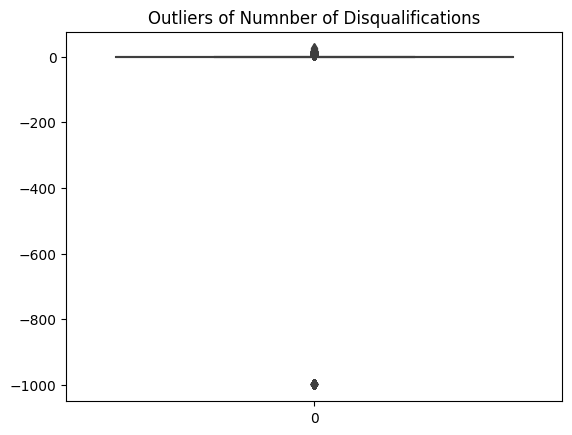

In [399]:
sns.boxplot(df[col[19]])
plt.title("Outliers of Numnber of Disqualifications")

Text(0.5, 1.0, 'Outliers of Matches Played')

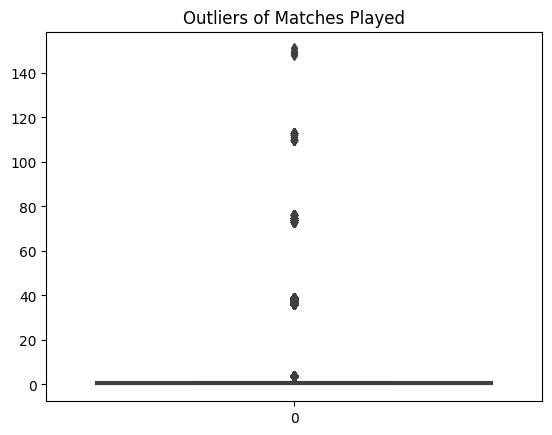

In [400]:
sns.boxplot(df[col[15]])
plt.title("Outliers of Matches Played")

Considering outiers both in "Matches Played" and "Number of Qualification are Higher"

In [401]:
def minmax(data,column):
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)

  IQR = Q3 -Q1

  Min = Q1-1.5*IQR
  Max = Q3+1.5*IQR
  return Min,Max

In [402]:
Min,Max = minmax(df,'no_of_disqualifications')


In [403]:
outliers1 = np.where(((df['no_of_disqualifications']<Min)|(df['no_of_disqualifications']>Max)))[0]

In [404]:
Min,Max = minmax(df,'matches_played')

In [405]:
outliers2 = np.where(((df['matches_played']<Min)|(df['matches_played']>Max)))[0]

In [406]:
outliers2 = [i for i in outliers2 if i not in outliers1]

In [407]:
df.drop(index=outliers1, inplace=True)

In [408]:
df.drop(index=outliers2, inplace=True)

# Encoding object data types

In [409]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12209 entries, 1 to 13993
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        12209 non-null  int64  
 1   gender                     12209 non-null  object 
 2   country                    12209 non-null  object 
 3   height                     12209 non-null  object 
 4   weight                     12209 non-null  object 
 5   ball_controlling_skills    12209 non-null  float64
 6   body_reflexes              12209 non-null  float64
 7   body_balance               12209 non-null  float64
 8   jumping_skills             12209 non-null  float64
 9   penalties_conversion_rate  12209 non-null  float64
 10  mental_strength            12209 non-null  float64
 11  goalkeeping_skills         12209 non-null  float64
 12  defending_skills           12209 non-null  float64
 13  passing_skills             12209 non-null  float64


In [410]:
col= list(df.select_dtypes('object').columns)
col

['gender',
 'country',
 'height',
 'weight',
 'strong_foot',
 'dedication_level',
 'coaching']

Getting columns with 'object' data types

In [414]:
# import encoding library
from sklearn.preprocessing import LabelEncoder

In [419]:
le = OrdinalEncoder()

In [420]:
for i in col:
    df[col] = le.fit_transform(df[col])

In [421]:
df

,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
1,18,1.0,122.0,5.0,24.0,54.0,69.0,70.0,62.0,53.0,...,0.0,5.300000,0.0,6.405482,3.0,2.0,1.0,3.0,0.0,0
2,16,0.0,133.0,18.0,44.0,34.0,43.0,45.0,69.0,49.0,...,1.0,4.700000,0.0,6.600000,5.0,1.0,0.0,2.0,0.0,1
4,19,0.0,5.0,13.0,32.0,47.0,61.0,74.0,57.0,49.0,...,2.0,5.822068,0.0,5.700000,5.0,2.0,0.0,4.0,0.0,0
5,21,1.0,62.0,15.0,46.0,63.0,69.0,65.0,65.0,55.0,...,2.0,6.300000,0.0,6.900000,3.0,2.0,0.0,7.0,0.0,0
6,24,0.0,28.0,5.0,24.0,64.0,68.0,71.0,53.0,42.0,...,1.0,6.900000,1.0,7.300000,2.0,0.0,0.0,10.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13987,25,0.0,29.0,5.0,31.0,70.0,79.0,66.0,71.0,76.0,...,2.0,6.400000,1.0,8.200000,3.0,0.0,1.0,10.0,0.0,1
13990,18,0.0,44.0,5.0,38.0,53.0,68.0,59.0,73.0,24.0,...,2.0,5.300000,0.0,5.600000,3.0,2.0,0.0,4.0,0.0,0
13991,17,1.0,77.0,15.0,44.0,56.0,73.0,62.0,50.0,47.0,...,1.0,5.700000,0.0,7.700000,3.0,1.0,2.0,2.0,0.0,1
13992,20,0.0,151.0,5.0,26.0,71.0,69.0,70.0,51.0,56.0,...,1.0,6.800000,1.0,5.800000,4.0,2.0,0.0,6.0,0.0,1


# Machine Modeling

Split our dataset in train and test dat

In [424]:
from sklearn.model_selection import train_test_split

In [430]:
X = df.iloc[:,:-1]
Y = df.selection

In [432]:
train_x, test_x, train_y, test_y = train_test_split(X,Y, test_size=0.25)

As for the convinnient **Random Forest Classifier** is suitable one

In [444]:
from sklearn.ensemble import RandomForestClassifier

In [443]:
from sklearn.model_selection import GridSearchCV

In [452]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state':[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
}

In [455]:
grid_search = GridSearchCV( estimator=rf, param_grid= param_grid, cv=5)

In [471]:
# grid_search.fit(train_x, train_y)

In [470]:
# grid_search.best_params_

In [507]:
rf = RandomForestClassifier(random_state=100, n_estimators=100,
                           criterion="gini")

In [520]:
rf.fit(train_x,train_y)

RandomForestClassifier(random_state=100)

In [521]:
predict = rf.predict(test_x)

In [502]:
from sklearn.metrics import accuracy_score

In [522]:
score = accuracy_score(predict, test_y)
print("Model Score is ", round(score,2) *100)

Model Score is  85.0
